## INTRODUCTION TO MACHINE LEARNING USING TENSORFLOW 2

### Getting Data

In [3]:
!git clone https://github.com/prajnasb/observations.git # getting data 

fatal: destination path 'observations' already exists and is not an empty directory.


### Importing Required API's

In [4]:
# all the necessary imports
import os
import cv2
import numpy as np 
from glob import glob
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import tensorflow  as tf
%matplotlib inline

In [5]:
# which tf version?
tf.__version__

'2.4.1'

##Reading Data & Preparing

In [6]:
# in python, glob is to retrieve files/pathnames matching a specified pattern
# sample masked images
sample_masked = glob('/content/observations/experiements/data/with_mask/*')[:5]
for im_path in sample_masked:
  print(im_path)

/content/observations/experiements/data/with_mask/augmented_image_177.jpg
/content/observations/experiements/data/with_mask/augmented_image_60.jpg
/content/observations/experiements/data/with_mask/404-with-mask.jpg
/content/observations/experiements/data/with_mask/365-with-mask.jpg
/content/observations/experiements/data/with_mask/augmented_image_26.jpg


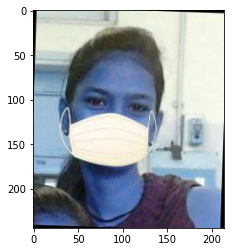

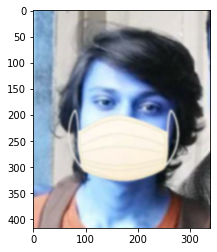

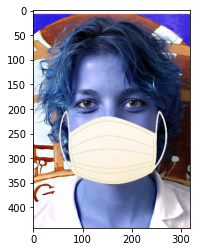

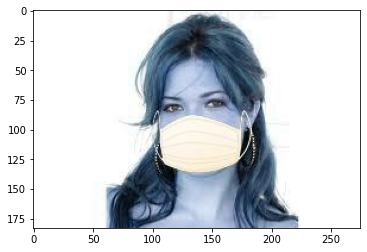

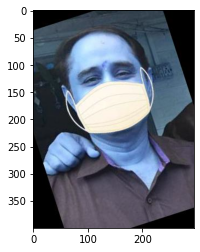

In [7]:
for im_path in sample_masked:
  image = cv2.imread(im_path)
  plt.imshow(image)
  plt.show()

In [8]:
# in python, glob is to retrieve files/pathnames matching a specified pattern
# sample no mask images
sample_no_mask = glob('/content/observations/experiements/data/without_mask/*')[:5]
for im_path in sample_no_mask:
  print(im_path)

/content/observations/experiements/data/without_mask/412.jpg
/content/observations/experiements/data/without_mask/augmented_image_224.jpg
/content/observations/experiements/data/without_mask/augmented_image_177.jpg
/content/observations/experiements/data/without_mask/augmented_image_60.jpg
/content/observations/experiements/data/without_mask/442.jpg


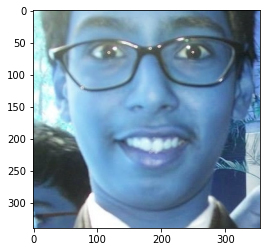

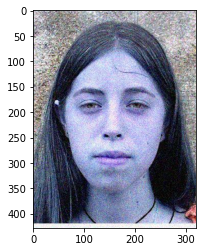

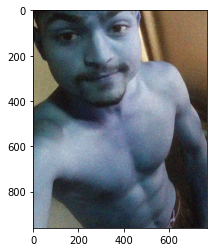

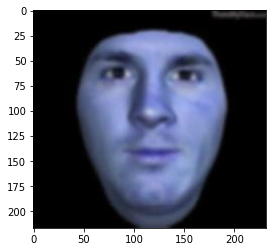

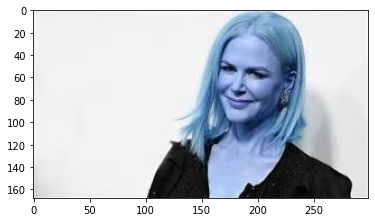

In [9]:
for im_path in sample_no_mask:
  image = cv2.imread(im_path)
  plt.imshow(image)
  plt.show()

In [12]:
# function to read images & resize them to 100x100
# path - location on the disk
# label [0 no_mask, 1 masked], 
def read_images(path,label):
  images, labels = [], []
  for p in path:
    image_read = cv2.imread(p)
    image_read = cv2.resize(image_read,(100,100))
    images.append(image_read)
    labels.append(label)
  return images, labels

In [13]:
# readig images with and without mask and
# passing the corresponding labels
masked_images, masked_labels = read_images(glob('/content/observations/experiements/data/with_mask/*'), 1)
no_mask_images, no_mask_labels = read_images(glob('/content/observations/experiements/data/without_mask/*'), 0)

In [14]:
print(len(masked_images),len(masked_labels),len(no_mask_images),len(no_mask_labels))

690 690 686 686


In [15]:
# combining labels+ images and converting to numpy array
combined_images = np.array(masked_images+no_mask_images)
combined_labels = np.array(masked_labels+no_mask_labels)

In [17]:
# shape of combined
print(combined_images.shape,combined_labels.shape)

(1376, 100, 100, 3) (1376,)


## Getting Ready for Training

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
#one_hot encoding the labels
encoded_labels = to_categorical(combined_labels)
print(encoded_labels[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [20]:
#reshaping the images 
combined_images = combined_images.reshape(1376,-1)
print(combined_images.shape)

(1376, 30000)


In [21]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(combined_images, encoded_labels, test_size=0.05, random_state=42)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1307, 30000) (69, 30000) (1307, 2) (69, 2)


## Building the Model

In [23]:
# TF Training API's
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [24]:
# Neural Network Model
model = Sequential([
    Dense(30000,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(100,activation='relu'),
    Dense(2,activation='softmax')
])

In [25]:
# getting the model ready
optimizer = SGD(learning_rate=0.001,momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [26]:
# & finally :)
model.fit(X_train/255.0,y_train,batch_size=32,epochs=20)

Epoch 1/20
41/41 [==============================] - 8s 135ms/step - loss: 0.6107 - accuracy: 0.6543
Epoch 2/20
41/41 [==============================] - 5s 134ms/step - loss: 0.2843 - accuracy: 0.8693
Epoch 3/20
41/41 [==============================] - 5s 133ms/step - loss: 0.2176 - accuracy: 0.9224
Epoch 4/20
41/41 [==============================] - 5s 134ms/step - loss: 0.1693 - accuracy: 0.9390
Epoch 5/20
41/41 [==============================] - 5s 134ms/step - loss: 0.1450 - accuracy: 0.9367
Epoch 6/20
41/41 [==============================] - 5s 134ms/step - loss: 0.1284 - accuracy: 0.9495
Epoch 7/20
41/41 [==============================] - 5s 133ms/step - loss: 0.0574 - accuracy: 0.9781
Epoch 8/20
41/41 [==============================] - 5s 134ms/step - loss: 0.0458 - accuracy: 0.9912
Epoch 9/20
41/41 [==============================] - 5s 134ms/step - loss: 0.0448 - accuracy: 0.9908
Epoch 10/20
41/41 [==============================] - 5s 134ms/step - loss: 0.1558 - accuracy: 0.9363

In [27]:
# testing the performance on the test set
predictions = model.predict(X_test/255.0).argmax(axis=1)
actual = y_test.argmax(axis=1)

## Evaluating the Model

In [28]:
# evaluating on test set
from sklearn.metrics import accuracy_score

In [29]:
# accuracy on test 
test_accuracy = accuracy_score(predictions, actual)*100
print(test_accuracy)

95.65217391304348


MASKED


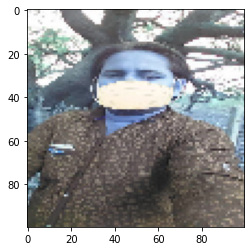

MASKED


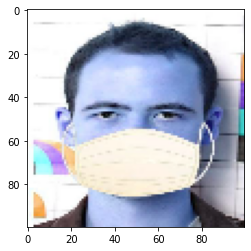

NO MASK


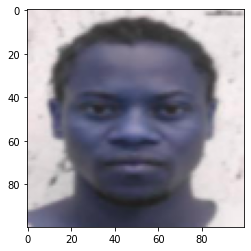

MASKED


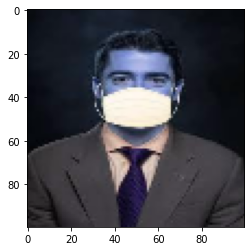

MASKED


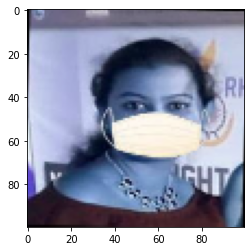

MASKED


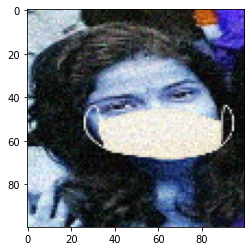

MASKED


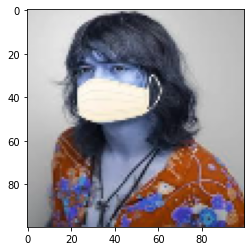

MASKED


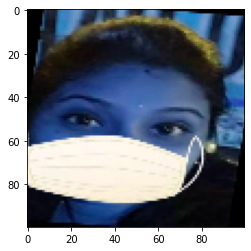

MASKED


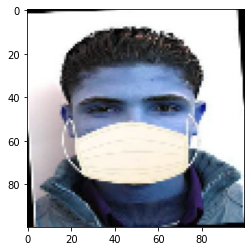

NO MASK


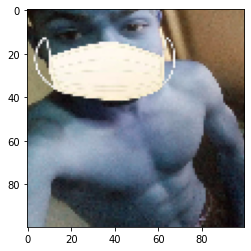

MASKED


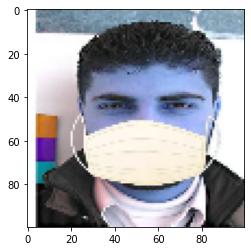

MASKED


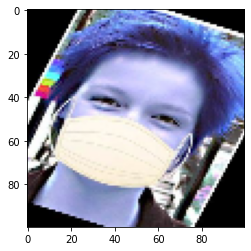

NO MASK


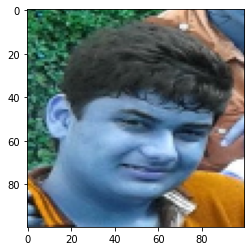

NO MASK


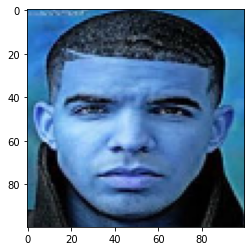

NO MASK


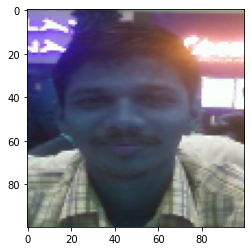

MASKED


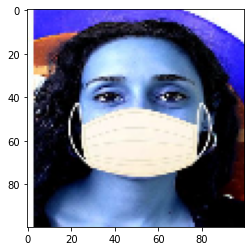

NO MASK


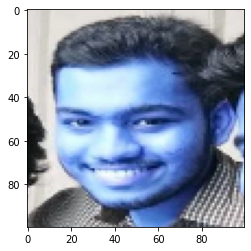

MASKED


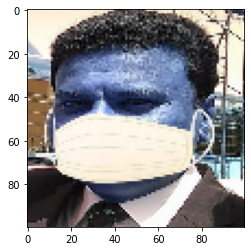

NO MASK


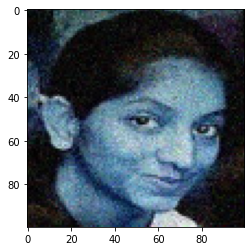

NO MASK


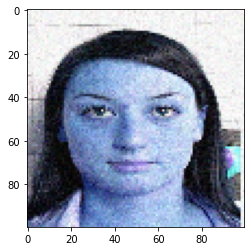

MASKED


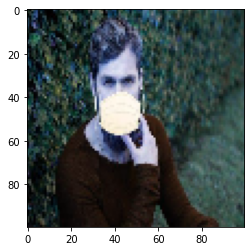

MASKED


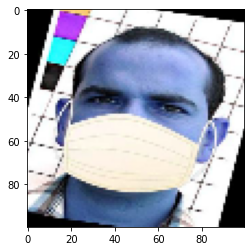

MASKED


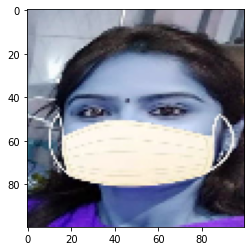

MASKED


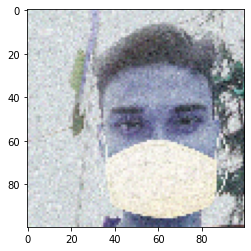

MASKED


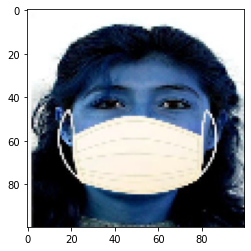

NO MASK


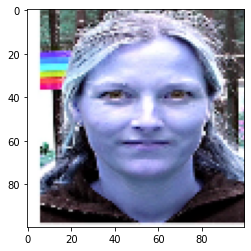

MASKED


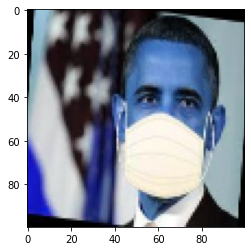

NO MASK


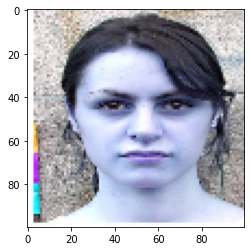

MASKED


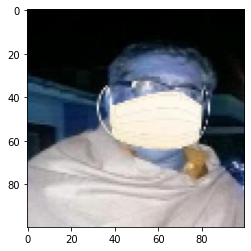

MASKED


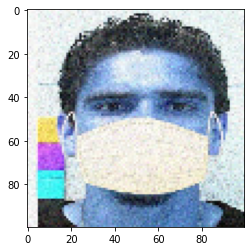

NO MASK


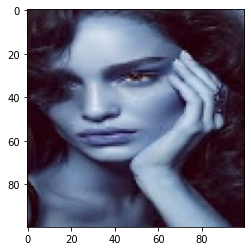

NO MASK


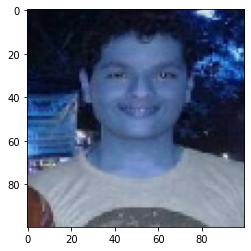

NO MASK


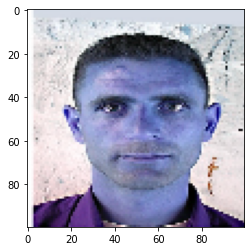

NO MASK


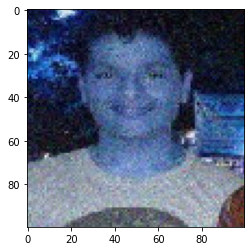

NO MASK


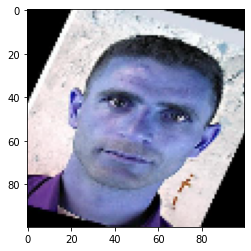

MASKED


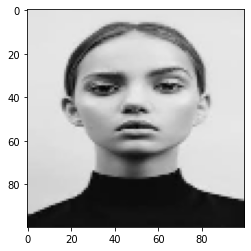

NO MASK


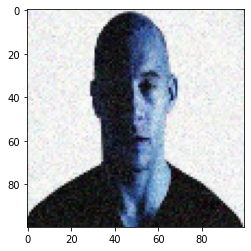

MASKED


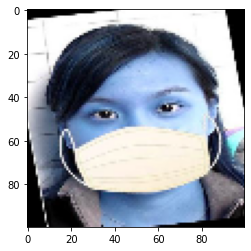

MASKED


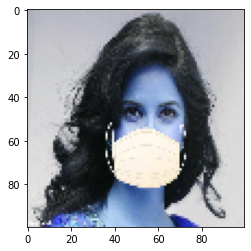

NO MASK


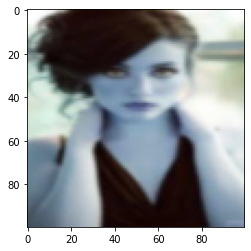

NO MASK


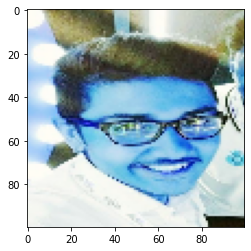

MASKED


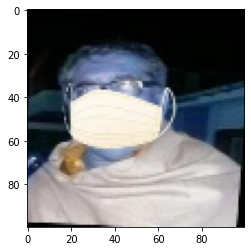

MASKED


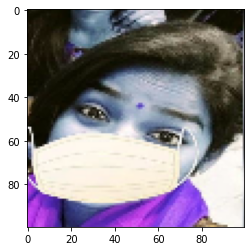

MASKED


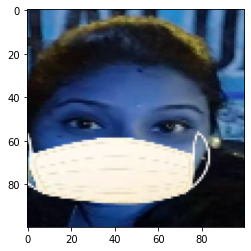

NO MASK


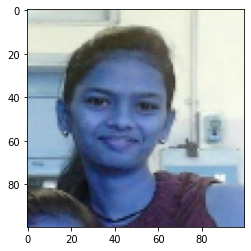

NO MASK


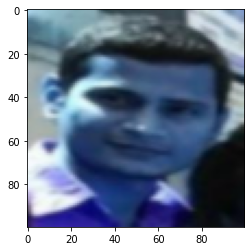

MASKED


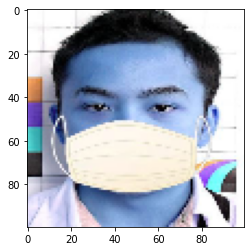

MASKED


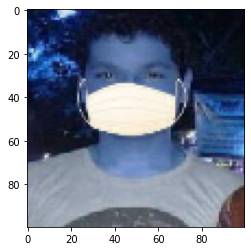

NO MASK


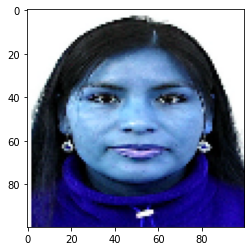

NO MASK


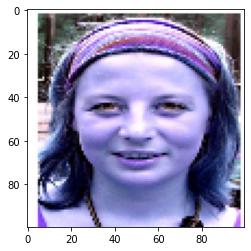

NO MASK


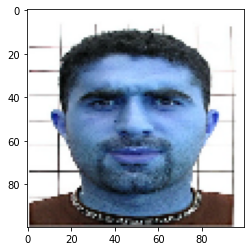

NO MASK


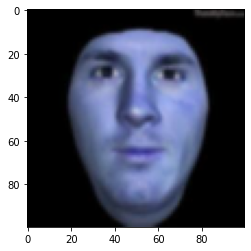

NO MASK


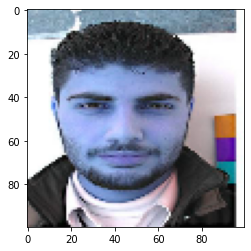

MASKED


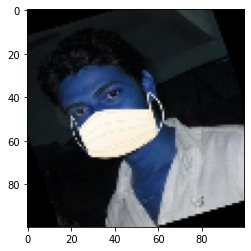

MASKED


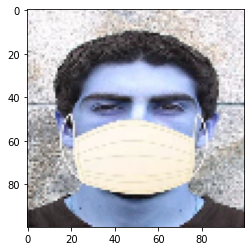

MASKED


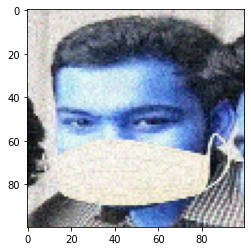

MASKED


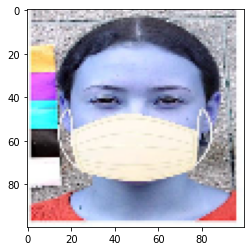

MASKED


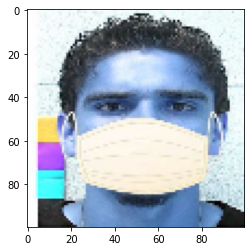

NO MASK


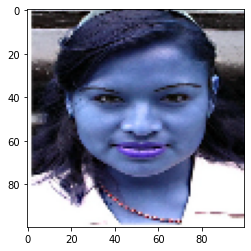

MASKED


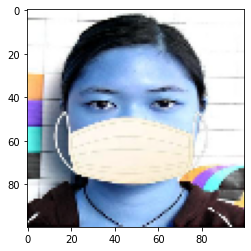

NO MASK


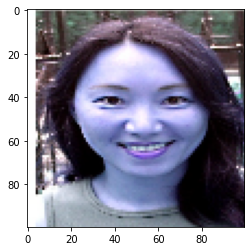

NO MASK


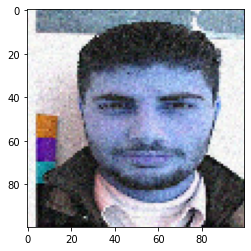

NO MASK


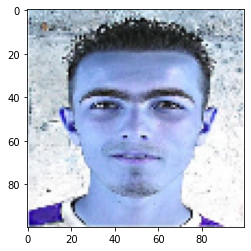

NO MASK


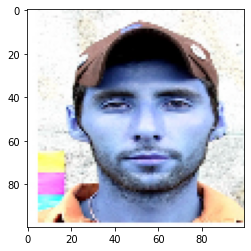

NO MASK


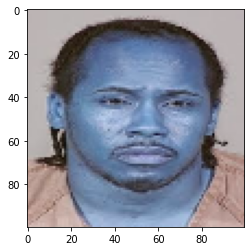

MASKED


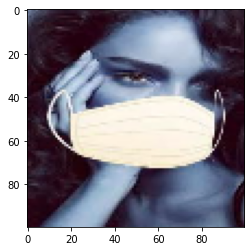

MASKED


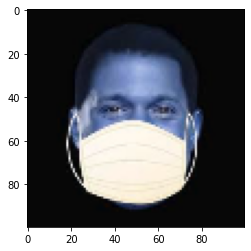

MASKED


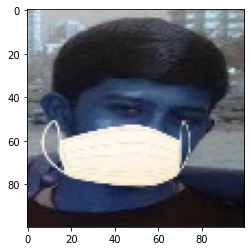

NO MASK


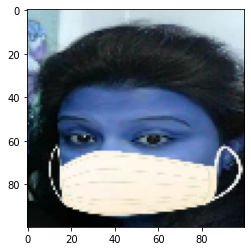

In [30]:
for ix, im in enumerate(X_test):
  if predictions[ix]==0:
    print('NO MASK')
  else:
    print('MASKED')
  plt.imshow(im.reshape(100,100,3))
  plt.show()